# Experimentos con Dataset Disvoice Mujeres
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/DivisionSexo/mujeres*
* Módulo de carga de datos: */src/cargaDatosMujeres.py*
     * Cada uno Contiene load_....py siendo ... todos los conjuntos de datos extraidos para Disvoice de mujeres. [30: 18 normales + 12 excatos Orozco 2016 ]
     
* **Cuando dividimos por sexo ell que mejor funciona es art_campana, seguido de petaka. Esto se ajusta más a los resultados de los papers donde se dice que las palabras son las que mejor funcionan. Aun así, ni nos acercamos a los resultados que obtienen en esos papers.**

* **Ademas se obtienen los mejores resultados con las ccas tipo art_-..., que son los equivalentes a unvoiced (Transiciones)**

* **Por lo general suben las medidas un poco todas, hasta llegar algunos clasificadores al 0.8, cosa que en los anteriores experimenteos llegaban uno o dos como mucho. Se mejoran los resultados en pocos puntos para los clasificadores, sin embargo tampoco es una mejora significativa ya que EN LA MAYORIA DE LOS CASOS NO SE SUPERA EL MEJOR SCORE DE ANTERIORES RESULTADOS**

##### SE CONSIGUE EL MEJOR RESULTADO OBTENIDO HASTA AHORA CON UN 0.9 PARA VT(0.5, NORM(ART_RT))-ADABOOST:
> Para el conjunto de datos articularion_rt, trans normalizarle y hacer selección de atributos con Variance Treshold y con el clasificador AdaBoost por Defecto

<a id="index"></a>
## Índice del notebook
1. [Experimentos mujeres](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [! Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [! Grid Search \ Seleckt KBest + RF](#skrf)
 9. [! Grid Search \ Seleckt KBest + AdaBoost](#skada)
 9. [! Grid Search \ Seleckt KBest + GBC](#skgbc)

 ----------------------

In [1]:
import cargaDatosMujeres
from extractorCcas import ExtractorCaracteristicas
from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Experimentos conjunto de datos mujeres <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Repetiremos el conjuto de experimentos que hemos ido realizando para todos los anteriores conjuntos de datos y así poder comparar resultados.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**
## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [13]:
tipoDatos = "cargaDatosMujeres"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"art_rt",
        "ORIGIN": tipoDatos+".load_art_rt",
    },
    {
        "ID_DATA":"art_rt_ON",
        "ORIGIN": tipoDatos+".load_art_rt_onset",
    },
    {
        "ID_DATA":"art_rt_OFF",
        "ORIGIN": tipoDatos+".load_art_rt_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_atleta",
        "ORIGIN":tipoDatos+".load_art_w_atleta",
    },
    {
        "ID_DATA":"art_w_atleta_ON",
        "ORIGIN":tipoDatos+".load_art_w_atleta_onset",
    },
    {
        "ID_DATA":"art_w_atleta_OFF",
        "ORIGIN":tipoDatos+".load_art_w_atleta_ofset",
    },
    
    
    
    {
        "ID_DATA":"art_w_braso",
        "ORIGIN":tipoDatos+".load_art_w_braso",
    },
    {
        "ID_DATA":"art_w_braso_ON",
        "ORIGIN":tipoDatos+".load_art_w_braso_onset",
    },
    {
        "ID_DATA":"art_w_braso_OFF",
        "ORIGIN":tipoDatos+".load_art_w_braso_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_campana",
        "ORIGIN":tipoDatos+".load_art_w_campana",
    },
    {
        "ID_DATA":"art_w_campana_ON",
        "ORIGIN":tipoDatos+".load_art_w_campana_onset",
    },
    {
        "ID_DATA":"art_w_campana_OFF",
        "ORIGIN":tipoDatos+".load_art_w_campana_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_gato",
        "ORIGIN":tipoDatos+".load_art_w_gato",
    },
    {
        "ID_DATA":"art_w_gato_ON",
        "ORIGIN":tipoDatos+".load_art_w_gato_onset",
    },
    {
        "ID_DATA":"art_w_gato_OFF",
        "ORIGIN":tipoDatos+".load_art_w_gato_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_petaka",
        "ORIGIN":tipoDatos+".load_art_w_petaka",
    },
    {
        "ID_DATA":"art_w_petaka_ON",
        "ORIGIN":tipoDatos+".load_art_w_petaka_onset",
    },
    {
        "ID_DATA":"art_w_petaka_OFF",
        "ORIGIN":tipoDatos+".load_art_w_petaka_ofset",
    },
    
    
    {
        "ID_DATA":"fon_rt",
        "ORIGIN":tipoDatos+".load_fon_rt",
    },
    {
        "ID_DATA":"fon_v_A",
        "ORIGIN":tipoDatos+".load_fon_v_A",
    },
    {
        "ID_DATA":"fon_v_E",
        "ORIGIN":tipoDatos+".load_fon_v_E",
    },
    {
        "ID_DATA":"fon_v_I",
        "ORIGIN":tipoDatos+".load_fon_v_I",
    },
    {
        "ID_DATA":"fon_v_O",
        "ORIGIN":tipoDatos+".load_fon_v_O",
    },
    {
        "ID_DATA":"fon_v_U",
        "ORIGIN":tipoDatos+".load_fon_v_U",
    },
    {
        "ID_DATA":"fon_w_atleta",
        "ORIGIN":tipoDatos+".load_fon_w_atleta",
    },
    {
        "ID_DATA":"fon_w_braso",
        "ORIGIN":tipoDatos+".load_fon_w_braso",
    },
    {
        "ID_DATA":"fon_w_campana",
        "ORIGIN":tipoDatos+".load_fon_w_campana",
    },
    {
        "ID_DATA":"fon_w_gato",
        "ORIGIN":tipoDatos+".load_fon_w_gato",
    },
    {
        "ID_DATA":"fon_w_petaka",
        "ORIGIN":tipoDatos+".load_fon_w_petaka",
    },
    {
        "ID_DATA":"prs_rt",
        "ORIGIN":tipoDatos+".load_prs_rt",
    }

]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor: art_w_campana: GBC: 0.808

AdaBOOST, que era antes el mejor, se comporta peor que antes en la mayoría de los datasets (excepciones como art_petaka). Sin embargo está dentro de los  que mejor funcionan: GBC, ADA, TREE. **(0.8 GBC-art_campana)**. 1 por encima del 0.8.

No hay mejora significativa ni debido a la división del conjunto por sexos, ni debido a la extracción exacta de ccas como las de Orozco (_ON y _OF)

In [14]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [15]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.583333,0.658333,0.550000,0.541667,0.516667,0.650000,0.383333,0.725000
art_rt_ON,0.683333,0.516667,0.591667,0.533333,0.450000,0.508333,0.450000,0.525000
art_rt_OFF,0.650000,0.525000,0.641667,0.608333,0.500000,0.633333,0.450000,0.441667
art_w_atleta,0.541667,0.558333,0.558333,0.550000,0.525000,0.450000,0.450000,0.550000
art_w_atleta_ON,0.600000,0.466667,0.533333,0.583333,0.416667,0.450000,0.516667,0.458333
art_w_atleta_OFF,0.608333,0.375000,0.591667,0.691667,0.558333,0.483333,0.583333,0.383333
art_w_braso,0.475000,0.458333,0.616667,0.475000,0.425000,0.558333,0.583333,0.458333
art_w_braso_ON,0.458333,0.558333,0.625000,0.591667,0.591667,0.541667,0.475000,0.516667
art_w_braso_OFF,0.433333,0.558333,0.550000,0.500000,0.516667,0.541667,0.550000,0.458333
art_w_campana,0.625000,0.750000,0.625000,0.500000,0.700000,0.791667,0.575000,0.808333


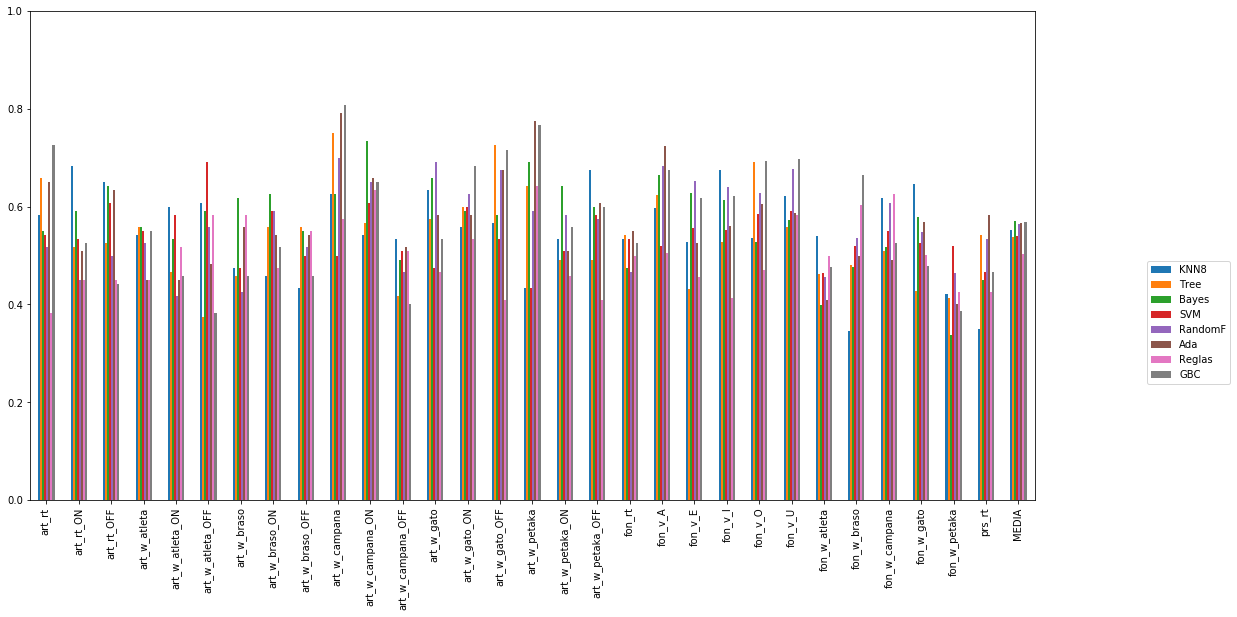

In [17]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: art_campana seguido por petaka. Los 3 mejores:  GBC, ADA, TREE. **(0.79 Ada-art_campana)**. 0 por encima del 0.8

In [29]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [30]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.525000,0.700000,0.550000,0.666667,0.641667,0.650000,0.558333,0.725000
art_rt_ON,0.491667,0.533333,0.591667,0.575000,0.483333,0.508333,0.508333,0.525000
art_rt_OFF,0.516667,0.491667,0.641667,0.491667,0.458333,0.608333,0.441667,0.458333
art_w_atleta,0.591667,0.475000,0.558333,0.508333,0.508333,0.450000,0.566667,0.525000
art_w_atleta_ON,0.475000,0.508333,0.533333,0.616667,0.466667,0.416667,0.541667,0.491667
art_w_atleta_OFF,0.525000,0.416667,0.591667,0.516667,0.583333,0.483333,0.375000,0.350000
art_w_braso,0.375000,0.491667,0.616667,0.500000,0.508333,0.558333,0.433333,0.508333
art_w_braso_ON,0.525000,0.508333,0.625000,0.550000,0.491667,0.541667,0.650000,0.508333
art_w_braso_OFF,0.566667,0.575000,0.550000,0.525000,0.583333,0.516667,0.433333,0.541667
art_w_campana,0.700000,0.766667,0.625000,0.591667,0.716667,0.791667,0.483333,0.758333


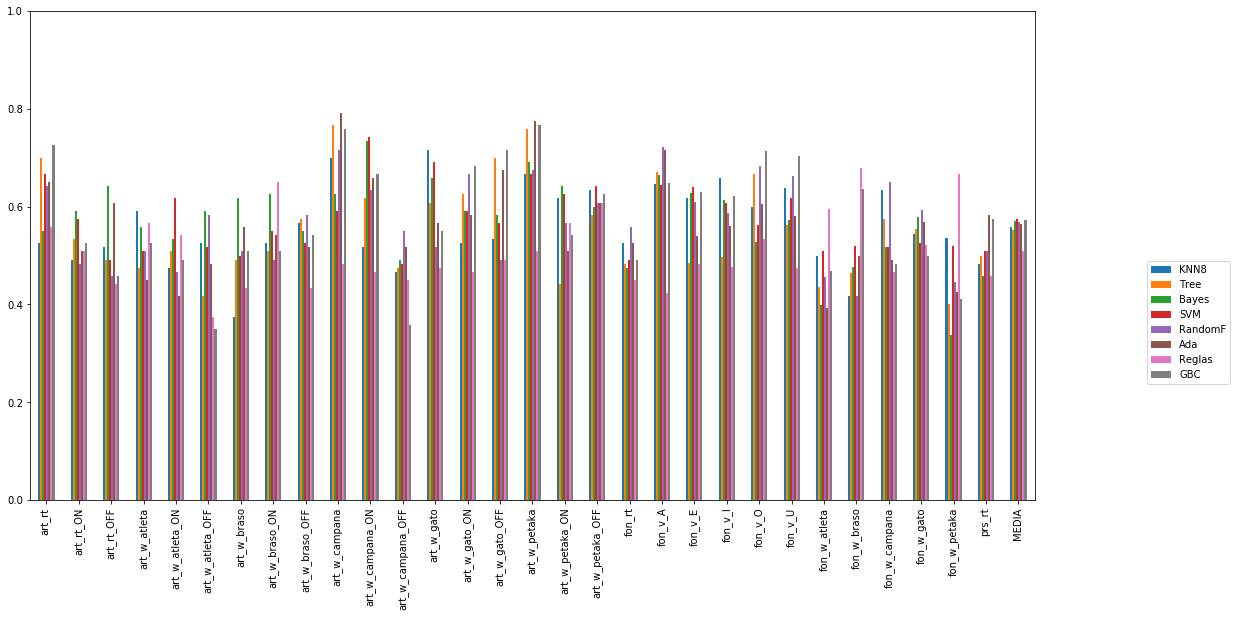

In [31]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
El que mejor funciona es art_campana, seguido de petaka. Los 2 mejores son Ada y GBC **(0.87 Ada-art_campana)**. **Nos acercamos al mejor resultado obtenido por nosotros en un experimento**. 4 por encima del 0.8.

Por primera vez vemos como **unvoiced**(exactas Orzco2016), nos ayuda a mejoras sensiblemente un resultado. concretamenre art_atleta_OFF, que mejora el SVM hasta 0.79 (cerca de mejor resultado de SVM hasta el momento).

In [32]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [33]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.609722,0.625000,0.619444,0.498611,0.597222,0.602778,0.583333,0.761111
art_rt_ON,0.613889,0.525000,0.636111,0.622222,0.497222,0.427778,0.400000,0.461111
art_rt_OFF,0.552778,0.466667,0.697222,0.627778,0.684722,0.666667,0.475000,0.480556
art_w_atleta,0.584722,0.500000,0.509722,0.651389,0.580556,0.447222,0.491667,0.541667
art_w_atleta_ON,0.658333,0.491667,0.538889,0.538889,0.555556,0.444444,0.508333,0.422222
art_w_atleta_OFF,0.662500,0.450000,0.625000,0.791667,0.472222,0.444444,0.416667,0.400000
art_w_braso,0.495833,0.525000,0.651389,0.437500,0.536111,0.513889,0.458333,0.527778
art_w_braso_ON,0.522222,0.575000,0.636111,0.530556,0.705556,0.472222,0.641667,0.475000
art_w_braso_OFF,0.419444,0.608333,0.552778,0.602778,0.631944,0.525000,0.466667,0.561111
art_w_campana,0.713889,0.725000,0.755556,0.608333,0.687500,0.883333,0.433333,0.872222


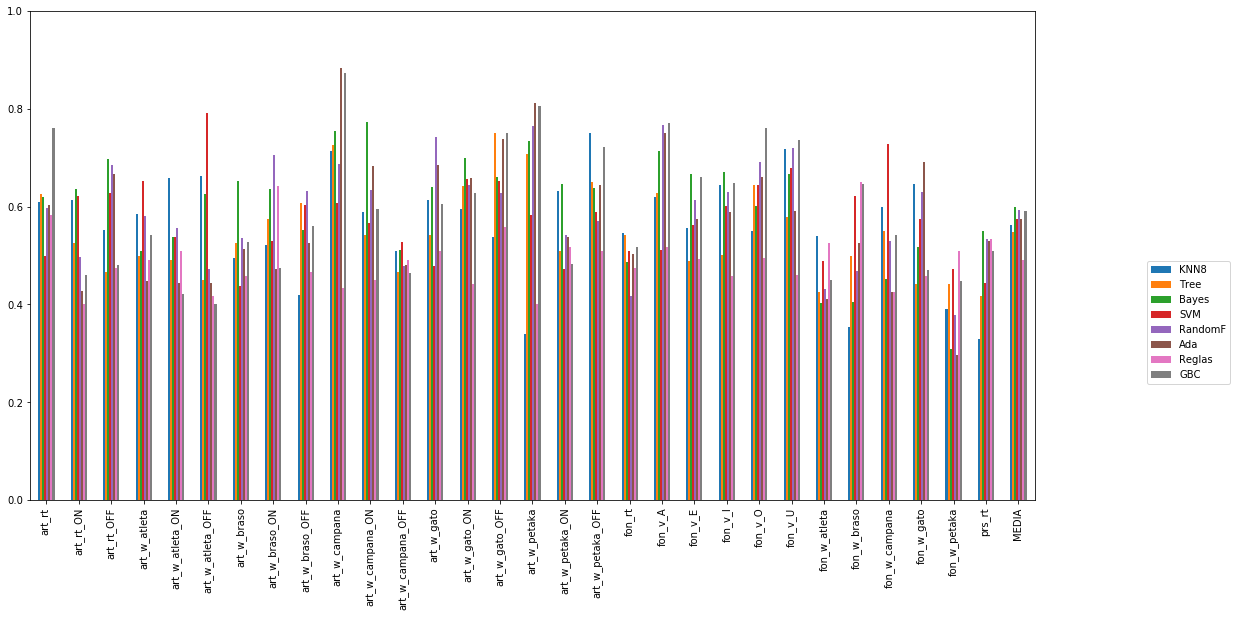

In [34]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados mejores con art_ccampana y art_petaka, siguiendo la tónica de los resultados anteriores.

En este caso vemos como ya 'muchos' (más que antes) clasificadores logran estar por encima del 0.8 AUC. 7 están por encima del 0.8. Mejor son Ada y Gbc, aunque se obtien resultados 'altos' con SVM-art_gato, RF-art_camp:0.8. **(0.883 Ada&GBC-art_campana)**

In [35]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [36]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.658333,0.616667,0.619444,0.702778,0.452778,0.602778,0.483333,0.786111
art_rt_ON,0.490278,0.525000,0.636111,0.683333,0.590278,0.427778,0.508333,0.497222
art_rt_OFF,0.577778,0.483333,0.697222,0.536111,0.419444,0.666667,0.358333,0.466667
art_w_atleta,0.626389,0.500000,0.498611,0.613889,0.598611,0.447222,0.550000,0.541667
art_w_atleta_ON,0.440278,0.491667,0.538889,0.491667,0.570833,0.466667,0.616667,0.447222
art_w_atleta_OFF,0.479167,0.400000,0.625000,0.550000,0.418056,0.444444,0.516667,0.397222
art_w_braso,0.438889,0.500000,0.651389,0.677778,0.577778,0.588889,0.466667,0.538889
art_w_braso_ON,0.554167,0.533333,0.636111,0.588889,0.565278,0.472222,0.466667,0.450000
art_w_braso_OFF,0.556944,0.641667,0.552778,0.552778,0.461111,0.525000,0.400000,0.583333
art_w_campana,0.781944,0.791667,0.755556,0.750000,0.800000,0.883333,0.616667,0.883333


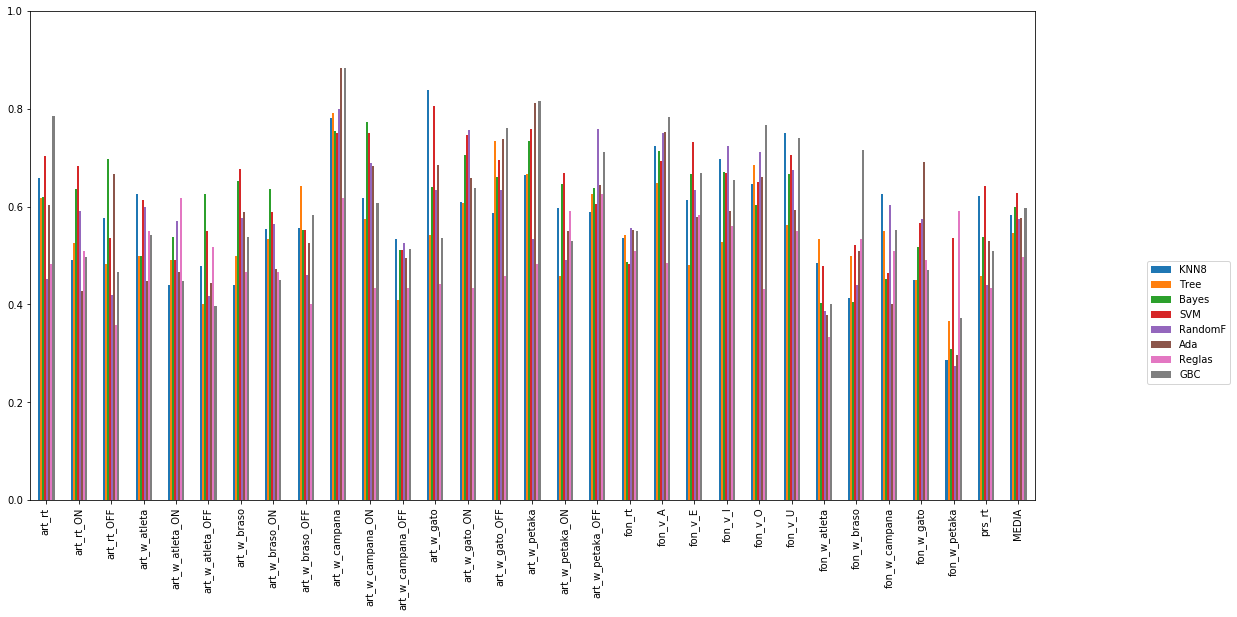

In [37]:
ex.process_results(all_results, data_names, model_names, 'bar')

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Explicada las funciones, parámetros devueltos y funcionamiento del experimento en notebooks anteriores y documentación de la calse. Experimento artículo 2016 Orozco: SVM con kernel gaussiano haciendo gridSearch de parámetros C y  𝛾  realizando 10-fold cross-validation. SCORING:AUC.  **Mejores resultados normalizando**.

**Si que se mejoran los scores en este tipo de experimento en comparación con todo lo realizado anteriormente: disvoice y disvoice + edad y sexo**. Al igual que antes comentar que las ccas exactas de orozco si que han dado en un caso buen resultado. **(0.8 art_gato_off - SVM('C': 10, 'gamma': 1))**

In [38]:
def best_to_panda(mej):
    mejores_ordenados = [(mej[m]['score'], mej[m]['params'], m) for m in sorted(mej, key=lambda x: mej[x]['score'], reverse=True)]
    return pd.DataFrame(columns = ['score','params','dtst'], data=mejores_ordenados).set_index('dtst')

In [45]:
ex = Experimenter()
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,2000,5000,10000], 'kernel': ['rbf'], 'gamma' : [1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosMujeres,svm.SVC(),param_grid, verbose=False, normalizar=True)
best_to_panda(bestsOrz)

,score,params
dtst,,
art_w_gato_ofset,0.800000,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"
fon_w_campana,0.760000,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}"
fon_v_U,0.752857,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"
art_w_atleta_onset,0.746667,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"
fon_v_A,0.728095,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
art_w_campana_ofset,0.720000,"{'C': 1, 'gamma': 500, 'kernel': 'rbf'}"
fon_w_gato,0.716667,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"
art_rt,0.713333,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
art_rt_ofset,0.700000,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"


##### Tanta diferencia entre splits?: importancia de la validación, manera de estratificar.

In [57]:
print(bestsOrz['art_w_gato_ofset']['results']['split9_test_score'].mean())
print(bestsOrz['art_w_gato_ofset']['results']['split5_test_score'].mean())

0.9119318181818182
0.2911931818181818


## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING = AUC. AdaBoost y GBC **(0.883 art_campana-AdaBoost)** igual que antes con params por defecto y atributos normalizados.

In [59]:
modulo = cargaDatosMujeres

In [65]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        sc = MinMaxScaler()
        X = sc.fit(X).transform(X) if clsf != 'AdaBoostClassifier' else X #Comentar para no normalizar
        params = 'chi2, K=19' if selector == 'SelectKBest' else ''
        params = 'threshold=(0.1)' if selector == 'VarianceThreshold' and clsf == 'AdaBoostClassifier' else ''
        estimators = [('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [66]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.500000,0.775000,0.702778,0.604167
art_rt_ofset,0.644444,0.480556,0.536111,0.544444
art_rt_onset,0.427778,0.522222,0.683333,0.404167
art_w_atleta,0.458333,0.530556,0.613889,0.422222
art_w_atleta_ofset,0.444444,0.422222,0.550000,0.483333
art_w_atleta_onset,0.444444,0.472222,0.491667,0.429167
art_w_braso,0.491667,0.536111,0.677778,0.525000
art_w_braso_ofset,0.500000,0.611111,0.552778,0.441667
art_w_braso_onset,0.472222,0.461111,0.588889,0.552778
art_w_campana,0.883333,0.836111,0.750000,0.794444


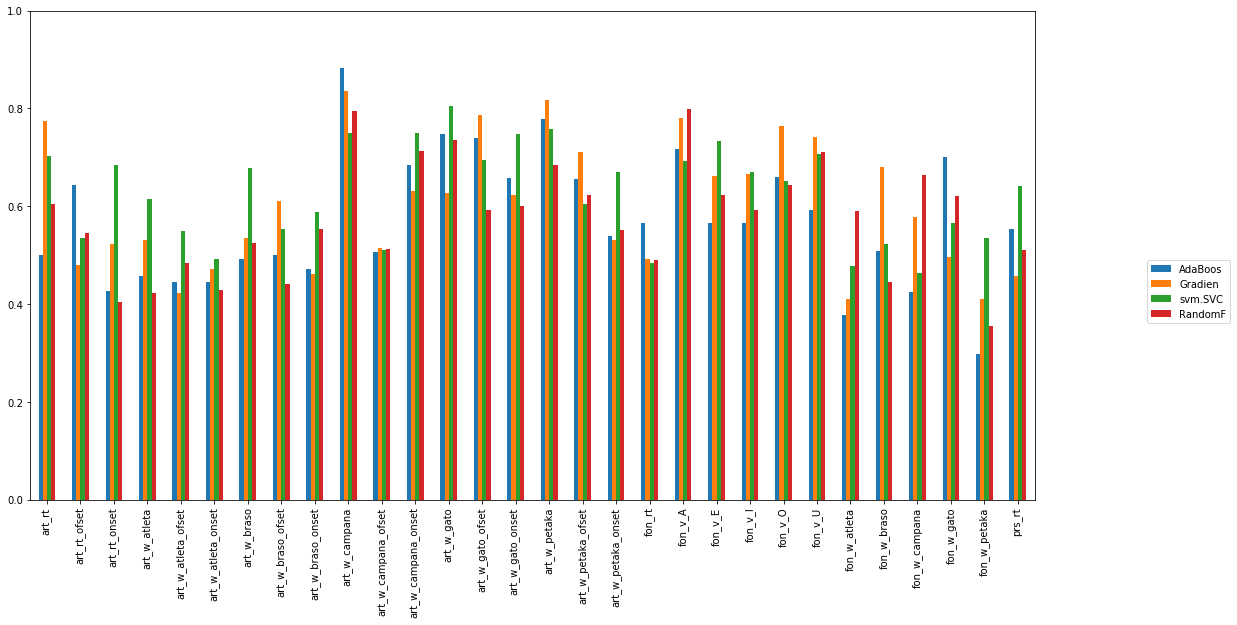

In [67]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejores resultados art_campana, art_ rt y art_gato_onset. 4 por encima de 0.8. **(0.82 RF-art_w_gato_on & art_rt GBC)**

In [68]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.702778,0.822222,0.758333,0.722222
art_rt_ofset,0.504167,0.566667,0.580556,0.583333
art_rt_onset,0.511111,0.608333,0.658333,0.513889
art_w_atleta,0.477778,0.455556,0.544444,0.445833
art_w_atleta_ofset,0.411111,0.402778,0.572222,0.619444
art_w_atleta_onset,0.547222,0.727778,0.600000,0.601389
art_w_braso,0.366667,0.475000,0.547222,0.526389
art_w_braso_ofset,0.658333,0.630556,0.611111,0.604167
art_w_braso_onset,0.552778,0.641667,0.586111,0.672222
art_w_campana,0.783333,0.761111,0.755556,0.819444


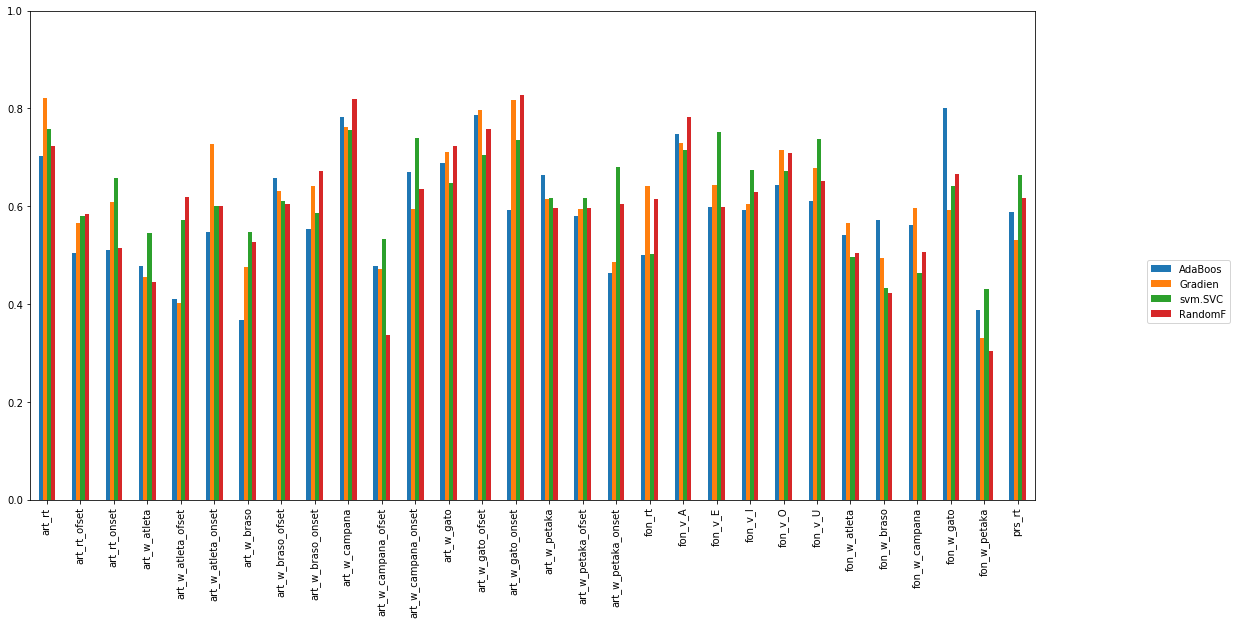

In [69]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Mejor resultado Normalizando**. SE BATE NUESTRO MEJOR RESULTADO Tonica habitual: mejores los art (transiciones), todos suben por lo general, algunos por encima del 0.8. 
* **SE CONSIGUE EL MEJOR RESULTADO OBTENIDO HASTA AHORA CON UN 0.9 PARA NORM(ART_RT)-ADABOOST-VT(0.05).**

##### Sin Normalizar 
3 por encima de 0.8: art_campana, petaka y gato. **(art_w_campana	0.88)** De la magnitud de los resultados mejores: 0.884 es el mejor para Adaboost en anteriores experimentos. Tonica habitual: mejores los art (transiciones), todos suben por lo general, algunos por encima del 0.8 pero se estancan sin conseguir batir el mejor resultado.

In [85]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.05, 0.08, 0.16, 0.2, 0.4 ])
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid, verbose=False, normalizar=False)

In [86]:
best_to_panda(bestsGsVtAda)

,score,params
dtst,,
art_w_campana,0.880000,{'select__threshold': 0.05}
art_w_petaka,0.840000,{'select__threshold': 0.2}
art_w_gato,0.826667,{'select__threshold': 0.2}
art_w_gato_ofset,0.786667,{'select__threshold': 0.4}
art_w_petaka_ofset,0.780000,{'select__threshold': 0.4}
fon_w_gato,0.750000,{'select__threshold': 0.4}
fon_v_A,0.743571,{'select__threshold': 0.4}
art_w_campana_onset,0.706667,{'select__threshold': 0.05}
art_w_gato_onset,0.700000,{'select__threshold': 0.05}


##### Normalizando
**SE BATE NUESTRO MEJOR RESULTADO** Tonica habitual: mejores los art (transiciones), todos suben por lo general, algunos por encima del 0.8. **SE CONSIGUE EL MEJOR RESULTADO OBTENIDO HASTA AHORA CON UN 0.9 PARA NORM(ART_RT)-ADABOOST-VT(0.05)**. También resultados 'altos' para art_campana y art_campana_onset (0.88 y 0.84).

In [88]:
param_grid = dict(select__threshold=[0.01, 0.02, 0.03, 0.04, 0.05])
ex = Experimenter()
bestsGsVtAdaN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsVtAdaN)

,score,params
dtst,,
art_rt,0.906667,{'select__threshold': 0.05}
art_w_campana,0.880000,{'select__threshold': 0.01}
art_w_campana_onset,0.840000,{'select__threshold': 0.05}
art_w_petaka,0.813333,{'select__threshold': 0.01}
art_rt_ofset,0.786667,{'select__threshold': 0.04}
fon_v_A,0.764762,{'select__threshold': 0.01}
art_w_gato_ofset,0.760000,{'select__threshold': 0.02}
fon_v_O,0.719762,{'select__threshold': 0.02}
art_w_gato,0.706667,{'select__threshold': 0.02}


##### Mejor resultado

In [10]:
X = cargaDatosMujeres.load_art_rt().data
y = cargaDatosMujeres.load_art_rt().target
sc = MinMaxScaler()
X = sc.fit(X).transform(X)
pip = Pipeline([('select', VarianceThreshold(0.05)), ('clf', AdaBoostClassifier())])
cross_val_score(pip,X,y,cv=10,scoring='roc_auc').mean()

0.9055555555555556

-----------------------
## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Tónica del experimento: los 4 mejores son con conjuntos de datos de articulación y van **de 0.84 a 0.88 aprox**.

In [124]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25, 40])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsSkRfN)

,score,params
dtst,,
fon_v_A,0.869048,"{'clf__max_depth': None, 'clf__min_samples_lea..."
art_w_campana,0.860000,"{'clf__max_depth': None, 'clf__min_samples_lea..."
art_rt,0.840000,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
art_w_gato_ofset,0.820000,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
art_w_gato,0.813333,"{'clf__max_depth': None, 'clf__min_samples_lea..."
art_w_gato_onset,0.800000,"{'clf__max_depth': None, 'clf__min_samples_lea..."
fon_v_U,0.787857,"{'clf__max_depth': None, 'clf__min_samples_lea..."
art_w_braso_onset,0.753333,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
art_w_campana_onset,0.753333,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."


## 1.7 Grid Search - Seleckt KBest + AdaBoost <a id="skada"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [126]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', AdaBoostClassifier())])
bestsGsSkADAN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)

In [127]:
best_to_panda(bestsGsSkADAN).head()

,score,params
dtst,,
art_w_campana,0.886667,{'select__k': 22}
art_rt,0.853333,{'select__k': 22}
art_w_gato_ofset,0.826667,{'select__k': 10}
fon_w_gato,0.804167,{'select__k': 10}
fon_v_A,0.788810,{'select__k': 10}


## 1.8 Grid Search - Seleckt KBest + GBC<a id="skgbc"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [128]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', GradientBoostingClassifier())])
bestsGsSkGBCN = ex.GridSearchPipe(cargaDatosMujeres, pip, param_grid,verbose=False, normalizar=True)

In [129]:
best_to_panda(bestsGsSkGBCN).head()

,score,params
dtst,,
art_rt,0.886667,{'select__k': 22}
art_w_gato_ofset,0.853333,{'select__k': 22}
art_w_gato_onset,0.853333,{'select__k': 10}
art_w_campana,0.846667,{'select__k': 22}
fon_v_A,0.796190,{'select__k': 22}
